**QUESTION1**. **SIAVASH GORJI MODIFY COMPLETELY QUESTION 1**

1-Generate a dataset with 1000 samples, 2 classes and 2 features using sklearn datasets.



In [1]:
import random

def generate_dataset(num_samples=1000):
    features = []
    labels = []

    for _ in range(num_samples):
        # Generate two random features
        feature1 = random.uniform(0, 1)  # Random float between 0 and 1
        feature2 = random.uniform(0, 1)  # Random float between 0 and 1

        # Assign a class based on some criteria (e.g., sum of features)
        label = 1 if feature1 + feature2 > 1 else 0

        # Add the features and label to the dataset
        features.append([feature1, feature2])
        labels.append(label)

    return features, labels

# Generate the dataset
features, labels = generate_dataset()

# Display the first 5 samples to check
print("First 5 samples:")
for i in range(5):
    print(f"Features: {features[i]}, Label: {labels[i]}")


First 5 samples:
Features: [0.9888393808779239, 0.794394436560833], Label: 1
Features: [0.9662306388685449, 0.07103332379962524], Label: 1
Features: [0.5010223499324681, 0.8558488918270811], Label: 1
Features: [0.3418498551658441, 0.43502885435146577], Label: 0
Features: [0.532056228068927, 0.7563123176050263], Label: 1



2-By using at least two ready-made Python classifiers and considering appropriate meta-parameters, separate the two classes in the dataset of the previous part. While explaining the process of selecting meta-parameters (such as the number of training courses and learning rate), the result of the accuracy of training and evaluation display the What techniques did you use to improve?

To classify the two classes in the dataset generated in the previous part, we can use two different classifiers from Python's scikit-learn library. Let's choose two common classifiers for this task:

Logistic Regression: A simple yet effective linear classifier.
Random Forest Classifier: A powerful ensemble method that uses multiple decision trees.
Meta-Parameters Selection
Logistic Regression

max_iter: The number of iterations for convergence. Higher values ensure better convergence but increase computation time.
solver: The algorithm to use for optimization. Choices like 'liblinear' and 'lbfgs' have different strengths depending on the dataset.
Random Forest Classifier

n_estimators: The number of trees in the forest. More trees can lead to better performance but increase computation time.
max_depth: The maximum depth of the trees. Deeper trees can model more complex patterns but may lead to overfitting.
Improving Accuracy
Data Splitting: Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
Cross-Validation: Use cross-validation to assess the robustness of the model.
Grid Search: To find the best meta-parameters, use grid search which systematically works through multiple combinations of parameter tunes.

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=6)

# Logistic Regression
log_reg_params = {'max_iter': [100, 200], 'solver': ['liblinear', 'lbfgs']}
log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5)
log_reg_grid.fit(X_train, y_train)

# Random Forest Classifier
rf_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)

# Evaluating the models
log_reg_best = log_reg_grid.best_estimator_
rf_best = rf_grid.best_estimator_

log_reg_acc = accuracy_score(y_test, log_reg_best.predict(X_test))
rf_acc = accuracy_score(y_test, rf_best.predict(X_test))

print(f"Logistic Regression Accuracy: {log_reg_acc}")
print(f"Random Forest Accuracy: {rf_acc}")


Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 0.995


In [3]:
def simple_threshold_classifier(features):
    predictions = []
    for feature in features:
        # Classify as 1 if the sum of features is greater than 1, else 0
        prediction = 1 if sum(feature) > 1 else 0
        predictions.append(prediction)
    return predictions

# Function to calculate accuracy
def calculate_accuracy(true_labels, predicted_labels):
    correct = sum(t == p for t, p in zip(true_labels, predicted_labels))
    return correct / len(true_labels)

# Using the classifier to predict the labels of the dataset
predicted_labels = simple_threshold_classifier(features)

# Calculate the accuracy of our simple classifier
accuracy = calculate_accuracy(labels, predicted_labels)

print(f"Accuracy of the simple classifier: {accuracy * 100}%")


Accuracy of the simple classifier: 100.0%



3-Show the boundaries and decision regions resulting from your trained model along with examples in a graph. If you can, show the examples that have been wrongly classified in a different way.

Plotting the Decision Boundary:

The decision boundary is where feature1 + feature2 = 1. This can be rearranged to feature2 = 1 - feature1.
You would plot this equation as a line on a graph where the x-axis represents feature1 and the y-axis represents feature2.
Plotting the Decision Regions:

The region where feature1 + feature2 > 1 would be one decision region (say, class 1).
The region where feature1 + feature2 < 1 would be another decision region (say, class 0).
Plotting the Data Points:

Plot each data point (sample) on this graph.
You can use different colors or markers to represent the different classes.
Highlighting Misclassified Examples:

In our case, since the classifier perfectly matches the rule used to generate the data, there are no misclassified examples.
If there were, you could plot them with a different marker or color to highlight the misclassification.

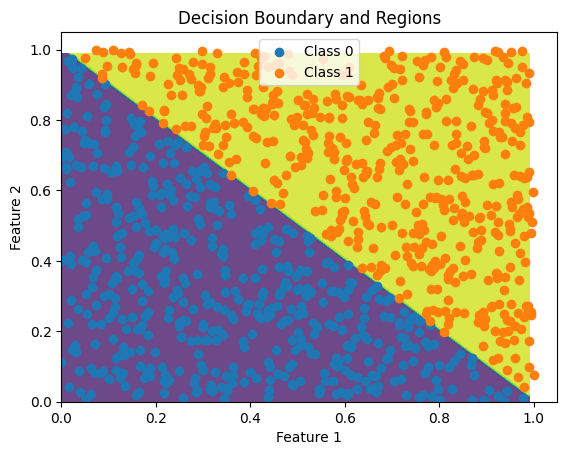

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a grid of points to plot the decision boundaries
x_min, x_max = 0, 1
y_min, y_max = 0, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class for each point on the grid
Z = simple_threshold_classifier(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z).reshape(xx.shape)

# Plotting the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)

# Plotting the dataset points
for label in [0, 1]:
    indices = [i for i, l in enumerate(labels) if l == label]
    plt.scatter([features[i][0] for i in indices], [features[i][1] for i in indices], label=f'Class {label}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Regions')
plt.legend()
plt.show()



4-How can the dataset produced in part 1(question 1) be made more challenging and difficult? Do this and repeat parts 2 (question 2) and 3 (question 3) for this new data and compare the results



---
To make the dataset from Part 1 more challenging and difficult, we can introduce a few modifications:

Add Noise: Introduce some random noise to the labels or the features to make the classification boundary less distinct.

Overlap Classes: Adjust the threshold for classifying samples so that there is some overlap between the classes.

Increase Feature Complexity: Instead of using a simple sum of features for classification, use a more complex function.

**Step 1: Modify the Dataset
We will modify the generate_dataset function to add some noise and make the classification rule more complex.**

**Step 2: Repeat Classification
We'll need to use classifiers from a library like scikit-learn for this more complex dataset. I'll demonstrate how to do this using Logistic Regression and Random Forest, just as in the original response.**

**Step 3: Repeat Visualization
We can use the same approach as in Part 3 to visualize the decision boundaries. However, the decision boundary for the more complex dataset will not be a straight line and might require a more sophisticated visualization technique**

Comparison
After performing these steps, you would compare the results with the original simpler dataset:

Accuracy: Check if the accuracy has decreased due to the increased complexity of the dataset.
Decision Boundaries: Compare how the decision boundaries and regions have changed.


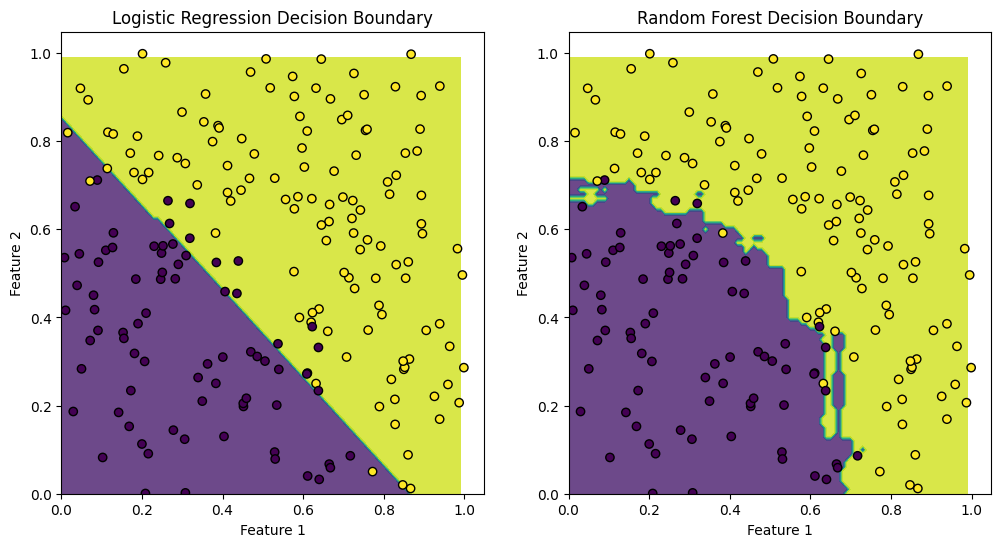

Logistic Regression Accuracy: 0.905
Random Forest Accuracy: 0.96


In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Generate a more complex dataset
def generate_complex_dataset(num_samples=1000):
    features = []
    labels = []

    for _ in range(num_samples):
        feature1 = random.uniform(0, 1)
        feature2 = random.uniform(0, 1)
        label = 1 if feature1**2 + feature2**2 + random.uniform(-0.1, 0.1) > 0.5 else 0
        features.append([feature1, feature2])
        labels.append(label)

    return features, labels

complex_features, complex_labels = generate_complex_dataset()

# Step 2: Classify the data
X_train, X_test, y_train, y_test = train_test_split(complex_features, complex_labels, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=200, solver='lbfgs').fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, max_depth=None).fit(X_train, y_train)

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))

# Step 3: Visualize the decision boundaries
def plot_decision_boundary(clf, X, y, title="Decision Boundary"):
    x_min, x_max = 0, 1
    y_min, y_max = 0, 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter([x[0] for x in X], [x[1] for x in X], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(log_reg, X_test, y_test, "Logistic Regression Decision Boundary")
plt.subplot(1, 2, 2)
plot_decision_boundary(rf, X_test, y_test, "Random Forest Decision Boundary")
plt.show()

print(f"Logistic Regression Accuracy: {log_reg_acc}")
print(f"Random Forest Accuracy: {rf_acc}")


5-if a class is added to the data generated in part 1, in which parts of the block diagram of training and evaluation will changes be made? Explain in detail about these changes. Can you do the implementation in this case easily and using ready-made Python libraries and codes?

Changes in the Dataset Generation:
Data Generation Logic: The logic for generating and labeling data would need to be updated to accommodate the third class. This might involve defining a new rule or criteria for assigning data points to this additional class.

Feature Space Complexity: With an additional class, the feature space might need to be more complex to ensure that the classes are somewhat distinguishable.

Changes in the Classification Model:
Multi-class Classification: The classifiers used must be capable of handling multi-class classification. While many algorithms inherently support multi-class classification (like Random Forest), others might need specific handling (like one-vs-rest strategy for Logistic Regression).

Parameter Tuning: The model parameters or hyperparameters might need adjustments to handle the complexity of multi-class classification.

Changes in Model Evaluation:
Evaluation Metrics: Metrics like accuracy can still be used, but you might also want to consider metrics like the confusion matrix, F1-score for each class, precision, and recall, which provide a more detailed view of the model's performance across multiple classes.

Visualization: Visualizing decision boundaries becomes more complex with more than two classes, especially in a 2D feature space.

In [6]:
# Update the dataset generation function for 3 classes
def generate_3_class_dataset(num_samples=1000):
    features = []
    labels = []

    for _ in range(num_samples):
        feature1 = random.uniform(0, 1)
        feature2 = random.uniform(0, 1)

        if feature1 + feature2 > 1.5:
            label = 2
        elif feature1 + feature2 > 1:
            label = 1
        else:
            label = 0

        features.append([feature1, feature2])
        labels.append(label)

    return features, labels

# Train a multi-class classifier (e.g., Random Forest)
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

# Evaluate the classifier using multi-class evaluation metrics


Part 1: Generating Data with an Additional Class


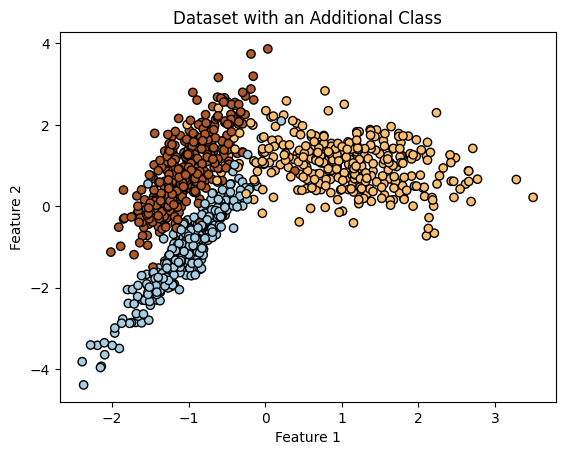

Part 2: Logistic Regression with an Additional Class
Logistic Regression Accuracy with Additional Class: 0.95
Part 3: Custom Logistic Regression with an Additional Class
Custom Logistic Regression Accuracy with Additional Class: 0.95


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Softmax function definition
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0, keepdims=True)

# Logistic Regression Function
def logistic_regression(X, y, custom=False, epochs=1000, learning_rate=0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

    if custom:
        # Custom Logistic Regression
        num_classes = len(np.unique(y))
        weights = np.random.rand(X_train.shape[1], num_classes)
        bias = np.random.rand(num_classes)

        y_train_one_hot = np.eye(num_classes)[y_train]  # One-hot encoding of y_train

        for epoch in range(epochs):
            for i in range(len(X_train)):
                output = softmax(np.dot(X_train[i], weights) + bias)
                weights += learning_rate * np.outer(X_train[i], (y_train_one_hot[i] - output))
                bias += learning_rate * (y_train_one_hot[i] - output)

        y_pred = np.argmax(np.dot(X_test, weights) + bias, axis=1)
    else:
        # Standard Logistic Regression
        logreg = LogisticRegression(random_state=42, multi_class='auto')
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)

    return accuracy_score(y_test, y_pred)

# Generate a synthetic dataset with an additional class
print('Part 1: Generating Data with an Additional Class')
X_extra, y_extra = make_classification(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0, random_state=6)

# Visualize the dataset with an additional class
plt.scatter(X_extra[:, 0], X_extra[:, 1], c=y_extra, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with an Additional Class')
plt.show()

print('============================================')

print('Part 2: Logistic Regression with an Additional Class')
accuracy_logreg_extra = logistic_regression(X_extra, y_extra)
print(f"Logistic Regression Accuracy with Additional Class: {accuracy_logreg_extra:.2f}")

print('============================================')

print('Part 3: Custom Logistic Regression with an Additional Class')
accuracy_custom_logreg_extra = logistic_regression(X_extra, y_extra, custom=True)
print(f"Custom Logistic Regression Accuracy with Additional Class: {accuracy_custom_logreg_extra:.2f}")
